In [50]:
import pandas as pd
import numpy as np
from sksurv.nonparametric import kaplan_meier_estimator as kmf
import matplotlib.pyplot as plt
from lifelines.statistics import logrank_test
import matplotlib.patches as mpatches

In [51]:
selected_cell = 'Inflammatory_Macrophage'

In [52]:
estimation = pd.read_csv('Immune.csv',index_col=0)
estimation.head()

Other  Non-inflammatory_Macrophage  alpha-beta_T_Cells  \
Mixture                                                                      
TCGA-FV-A495-01  0.502944                     0.039921            0.072609   
TCGA-G3-A3CH-11  0.702253                     0.034831            0.056965   
TCGA-CC-A3MB-01  0.422038                     0.037710            0.104666   
TCGA-BC-A3KF-01  0.533256                     0.081065            0.039572   
TCGA-DD-A4NV-01  0.607373                     0.012717            0.150426   

                 Inflammatory_Macrophage  NK-like_Cells  gamma-delta_T_Cells  \
Mixture                                                                        
TCGA-FV-A495-01                 0.118753       0.043602             0.114556   
TCGA-G3-A3CH-11                 0.025582       0.028985             0.072150   
TCGA-CC-A3MB-01                 0.088301       0.116197             0.087601   
TCGA-BC-A3KF-01                 0.060491       0.118433             0.086377   
TCGA-DD-A4NV-01                 0.025389       0.100700             0.000000   

                 Mature_B_Cells  Plasma_Cells  P-value  Correlation      RMSE  
Mixture                                                                        
TCGA-FV-A495-01        0.024016      0.083598        0     0.850308  0.566432  
TCGA-G3-A3CH-11        0.079234      0.000000        0     0.905146  0.452388  
TCGA-CC-A3MB-01        0.016644      0.126841        0     0.757387  0.683086  
TCGA-BC-A3KF-01        0.022655      0.058151        0     0.798699  0.616649  
TCGA-DD-A4NV-01        0.029398      0.073997        0     0.730497  0.691188

In [53]:
sample_list = [sample for sample in estimation.index.values if '-01' in sample]
estimation = estimation.reindex(sample_list)

In [54]:
survival_data = pd.read_csv('survival_LIHC_survival.txt',index_col=0,delimiter='\t')
sample_list = [sample for sample in survival_data.index.values if '-01' in sample]
survival_data = survival_data.reindex(sample_list)
survival_data.head()

_PATIENT  OS  OS.time  DSS  DSS.time  DFI  DFI.time  PFI  \
sample                                                                          
TCGA-2V-A95S-01  TCGA-2V-A95S   0      NaN  0.0       NaN  0.0       NaN    0   
TCGA-2Y-A9GS-01  TCGA-2Y-A9GS   1    724.0  1.0     724.0  1.0     102.0    1   
TCGA-2Y-A9GT-01  TCGA-2Y-A9GT   1   1624.0  1.0    1624.0  1.0    1083.0    1   
TCGA-2Y-A9GU-01  TCGA-2Y-A9GU   0   1939.0  0.0    1939.0  0.0    1939.0    0   
TCGA-2Y-A9GV-01  TCGA-2Y-A9GV   1   2532.0  1.0    2532.0  0.0    2532.0    1   

                 PFI.time Redaction  
sample                               
TCGA-2V-A95S-01       NaN       NaN  
TCGA-2Y-A9GS-01     102.0       NaN  
TCGA-2Y-A9GT-01    1083.0       NaN  
TCGA-2Y-A9GU-01    1939.0       NaN  
TCGA-2Y-A9GV-01    1745.0       NaN

In [55]:
dfs_data = survival_data.filter(['DFI.time', 'DFI'])
dfs_data = dfs_data.dropna(axis=0,how='any')
binary = {1:True,0:False}
dfs_data['DFS_E'] = [binary[event] for event in dfs_data['DFI']]
dfs_data['DFS_T'] = [time/30 for time in dfs_data['DFI.time']]
dfs_data.head()

DFI.time  DFI  DFS_E      DFS_T
sample                                          
TCGA-2Y-A9GS-01     102.0  1.0   True   3.400000
TCGA-2Y-A9GT-01    1083.0  1.0   True  36.100000
TCGA-2Y-A9GU-01    1939.0  0.0  False  64.633333
TCGA-2Y-A9GV-01    2532.0  0.0  False  84.400000
TCGA-2Y-A9GW-01    1229.0  1.0   True  40.966667

In [56]:
survival_test = estimation.merge(dfs_data,left_index=True,right_index=True,how='inner')
survival_test.head()

Other  Non-inflammatory_Macrophage  alpha-beta_T_Cells  \
TCGA-FV-A495-01  0.502944                     0.039921            0.072609   
TCGA-CC-A3MB-01  0.422038                     0.037710            0.104666   
TCGA-BC-A3KF-01  0.533256                     0.081065            0.039572   
TCGA-DD-A4NV-01  0.607373                     0.012717            0.150426   
TCGA-BD-A3EP-01  0.378858                     0.071268            0.113728   

                 Inflammatory_Macrophage  NK-like_Cells  gamma-delta_T_Cells  \
TCGA-FV-A495-01                 0.118753       0.043602             0.114556   
TCGA-CC-A3MB-01                 0.088301       0.116197             0.087601   
TCGA-BC-A3KF-01                 0.060491       0.118433             0.086377   
TCGA-DD-A4NV-01                 0.025389       0.100700             0.000000   
TCGA-BD-A3EP-01                 0.166749       0.075191             0.062765   

                 Mature_B_Cells  Plasma_Cells  P-value  Correlation      RMSE  \
TCGA-FV-A495-01        0.024016      0.083598        0     0.850308  0.566432   
TCGA-CC-A3MB-01        0.016644      0.126841        0     0.757387  0.683086   
TCGA-BC-A3KF-01        0.022655      0.058151        0     0.798699  0.616649   
TCGA-DD-A4NV-01        0.029398      0.073997        0     0.730497  0.691188   
TCGA-BD-A3EP-01        0.050543      0.080897        0     0.877413  0.551734   

                 DFI.time  DFI  DFS_E      DFS_T  
TCGA-FV-A495-01       1.0  0.0  False   0.033333  
TCGA-CC-A3MB-01     315.0  0.0  False  10.500000  
TCGA-BC-A3KF-01       8.0  0.0  False   0.266667  
TCGA-DD-A4NV-01    2398.0  0.0  False  79.933333  
TCGA-BD-A3EP-01     409.0  0.0  False  13.633333

In [57]:
survival_reorder = survival_test.sort_values(selected_cell,axis=0,ascending=False)
survival_reorder.head()

Other  Non-inflammatory_Macrophage  alpha-beta_T_Cells  \
TCGA-CC-A3M9-01  0.000000                     0.047036            0.054939   
TCGA-DD-A3A6-01  0.007279                     0.119372            0.097809   
TCGA-YA-A8S7-01  0.066667                     0.155215            0.045819   
TCGA-CC-A9FV-01  0.000000                     0.211497            0.034919   
TCGA-FV-A3I0-01  0.011646                     0.000000            0.128337   

                 Inflammatory_Macrophage  NK-like_Cells  gamma-delta_T_Cells  \
TCGA-CC-A3M9-01                 0.397796       0.045190             0.264668   
TCGA-DD-A3A6-01                 0.375444       0.174044             0.110353   
TCGA-YA-A8S7-01                 0.356380       0.083771             0.117272   
TCGA-CC-A9FV-01                 0.326098       0.090877             0.192837   
TCGA-FV-A3I0-01                 0.323472       0.195669             0.096635   

                 Mature_B_Cells  Plasma_Cells  P-value  Correlation      RMSE  \
TCGA-CC-A3M9-01        0.000000      0.190370        0     0.684905  0.741975   
TCGA-DD-A3A6-01        0.000000      0.115699        0     0.431404  0.930471   
TCGA-YA-A8S7-01        0.037729      0.137147        0     0.769842  0.638718   
TCGA-CC-A9FV-01        0.078002      0.065769        0     0.647563  0.778271   
TCGA-FV-A3I0-01        0.005758      0.238483        0     0.423307  0.906421   

                 DFI.time  DFI  DFS_E       DFS_T  
TCGA-CC-A3M9-01     219.0  1.0   True    7.300000  
TCGA-DD-A3A6-01    3258.0  0.0  False  108.600000  
TCGA-YA-A8S7-01     398.0  1.0   True   13.266667  
TCGA-CC-A9FV-01       0.0  0.0  False    0.000000  
TCGA-FV-A3I0-01     159.0  1.0   True    5.300000

In [58]:
running_length = len(survival_reorder)

logrank_tests = []
cut_points = []

for i in range(running_length):
    cut_point = int(i+1)
    E = list(survival_reorder['DFS_E'])
    mid_point = int(len(E)/2)
    E_high = E[:cut_point]
    E_low = E[cut_point:]
    S = list(survival_reorder['DFS_T'])
    S_high = S[:cut_point]
    S_low = S[cut_point:]
    results = logrank_test(S_high,S_low,E_high,E_low)
    p = results.p_value
    cut_points.append(cut_point)
    logrank_tests.append(p)

optimization = pd.DataFrame(logrank_tests,index=cut_points,columns=['Log Rank Test'])

In [59]:
optimization = int(len(E)/2)

In [60]:
dfs_cut_level = survival_reorder[selected_cell][optimization]
dfs_cut_level

0.0741008153242675

In [61]:
E = list(survival_reorder['DFS_E'])
cut_point = optimization
E_high = E[:cut_point]
E_low = E[cut_point:]
S = list(survival_reorder['DFS_T'])
S_high = S[:cut_point]
S_low = S[cut_point:]
results = logrank_test(S_high,S_low,E_high,E_low)
p = results.p_value
p = round(p,5)
p

0.44482

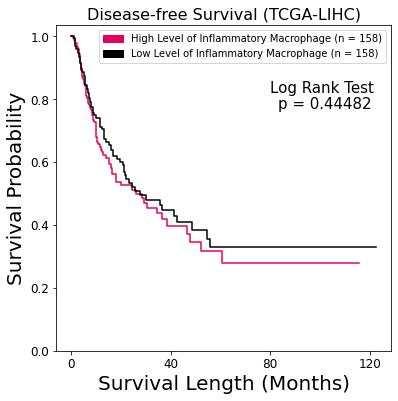

In [62]:
plt.figure(figsize=(6,6))
t,s = kmf(E_high, S_high)
plt.step(t,s,c='#e6005c')
t,s = kmf(E_low, S_low)
plt.step(t,s,c='k')
plt.xticks(np.arange(0,121,40),fontsize=12)
plt.yticks(np.arange(0,1.1,0.2),fontsize=12)
plt.xlabel('Survival Length (Months)', fontsize=20)
plt.ylabel('Survival Probability',fontsize=20)
high_patch = mpatches.Patch(color='#e6005c',label='High Level of Inflammatory Macrophage (n = %s)'%len(E_high))
low_patch = mpatches.Patch(color='k',label='Low Level of Inflammatory Macrophage (n = %s)'%len(E_low))
plt.text(80,0.82, 'Log Rank Test',fontsize=15)
plt.text(83,0.77, 'p = %s'%p,fontsize=15)
plt.legend(handles=[high_patch,low_patch],fontsize=10)
plt.title('Disease-free Survival (TCGA-LIHC)',fontsize=16)
plt.savefig('TCGA-LIHC.%s.DFS.pdf'%selected_cell,format='pdf')

In [63]:
os_data = survival_data.filter(['OS.time', 'OS'])
os_data = os_data.dropna(axis=0,how='any')
binary = {1:True,0:False}
os_data['OS_E'] = [binary[event] for event in os_data['OS']]
os_data['OS_T'] = [time/30 for time in os_data['OS.time']]
os_data.head()

OS.time  OS   OS_E       OS_T
sample                                        
TCGA-2Y-A9GS-01    724.0   1   True  24.133333
TCGA-2Y-A9GT-01   1624.0   1   True  54.133333
TCGA-2Y-A9GU-01   1939.0   0  False  64.633333
TCGA-2Y-A9GV-01   2532.0   1   True  84.400000
TCGA-2Y-A9GW-01   1271.0   1   True  42.366667

In [64]:
survival_test = estimation.merge(os_data,left_index=True,right_index=True,how='inner')
survival_test.head()

Other  Non-inflammatory_Macrophage  alpha-beta_T_Cells  \
TCGA-FV-A495-01  0.502944                     0.039921            0.072609   
TCGA-CC-A3MB-01  0.422038                     0.037710            0.104666   
TCGA-BC-A3KF-01  0.533256                     0.081065            0.039572   
TCGA-DD-A4NV-01  0.607373                     0.012717            0.150426   
TCGA-CC-A1HT-01  0.023753                     0.041536            0.130552   

                 Inflammatory_Macrophage  NK-like_Cells  gamma-delta_T_Cells  \
TCGA-FV-A495-01                 0.118753       0.043602             0.114556   
TCGA-CC-A3MB-01                 0.088301       0.116197             0.087601   
TCGA-BC-A3KF-01                 0.060491       0.118433             0.086377   
TCGA-DD-A4NV-01                 0.025389       0.100700             0.000000   
TCGA-CC-A1HT-01                 0.341192       0.059061             0.185780   

                 Mature_B_Cells  Plasma_Cells  P-value  Correlation      RMSE  \
TCGA-FV-A495-01        0.024016      0.083598        0     0.850308  0.566432   
TCGA-CC-A3MB-01        0.016644      0.126841        0     0.757387  0.683086   
TCGA-BC-A3KF-01        0.022655      0.058151        0     0.798699  0.616649   
TCGA-DD-A4NV-01        0.029398      0.073997        0     0.730497  0.691188   
TCGA-CC-A1HT-01        0.086472      0.131655        0     0.744643  0.717796   

                 OS.time  OS   OS_E       OS_T  
TCGA-FV-A495-01      1.0   0  False   0.033333  
TCGA-CC-A3MB-01    315.0   1   True  10.500000  
TCGA-BC-A3KF-01      8.0   0  False   0.266667  
TCGA-DD-A4NV-01   2398.0   0  False  79.933333  
TCGA-CC-A1HT-01    101.0   1   True   3.366667

In [65]:
survival_reorder = survival_test.sort_values(selected_cell,axis=0,ascending=False)
survival_reorder

Other  Non-inflammatory_Macrophage  alpha-beta_T_Cells  \
TCGA-CC-A3M9-01  0.000000                     0.047036            0.054939   
TCGA-DD-A3A6-01  0.007279                     0.119372            0.097809   
TCGA-YA-A8S7-01  0.066667                     0.155215            0.045819   
TCGA-CC-A1HT-01  0.023753                     0.041536            0.130552   
TCGA-CC-A9FV-01  0.000000                     0.211497            0.034919   
...                   ...                          ...                 ...   
TCGA-ZP-A9D0-01  0.647345                     0.026309            0.172555   
TCGA-DD-AAD0-01  0.471992                     0.109578            0.275429   
TCGA-DD-A1EB-01  0.617387                     0.004548            0.143788   
TCGA-DD-A11B-01  0.676142                     0.032352            0.140714   
TCGA-DD-A73D-01  0.597692                     0.107304            0.144682   

                 Inflammatory_Macrophage  NK-like_Cells  gamma-delta_T_Cells  \
TCGA-CC-A3M9-01                 0.397796       0.045190             0.264668   
TCGA-DD-A3A6-01                 0.375444       0.174044             0.110353   
TCGA-YA-A8S7-01                 0.356380       0.083771             0.117272   
TCGA-CC-A1HT-01                 0.341192       0.059061             0.185780   
TCGA-CC-A9FV-01                 0.326098       0.090877             0.192837   
...                                  ...            ...                  ...   
TCGA-ZP-A9D0-01                 0.000000       0.103871             0.004835   
TCGA-DD-AAD0-01                 0.000000       0.038143             0.045511   
TCGA-DD-A1EB-01                 0.000000       0.094087             0.019858   
TCGA-DD-A11B-01                 0.000000       0.064762             0.046716   
TCGA-DD-A73D-01                 0.000000       0.129146             0.000000   

                 Mature_B_Cells  Plasma_Cells  P-value  Correlation      RMSE  \
TCGA-CC-A3M9-01        0.000000      0.190370        0     0.684905  0.741975   
TCGA-DD-A3A6-01        0.000000      0.115699        0     0.431404  0.930471   
TCGA-YA-A8S7-01        0.037729      0.137147        0     0.769842  0.638718   
TCGA-CC-A1HT-01        0.086472      0.131655        0     0.744643  0.717796   
TCGA-CC-A9FV-01        0.078002      0.065769        0     0.647563  0.778271   
...                         ...           ...      ...          ...       ...   
TCGA-ZP-A9D0-01        0.005758      0.039326        0     0.794971  0.619018   
TCGA-DD-AAD0-01        0.000000      0.059347        0     0.650908  0.763316   
TCGA-DD-A1EB-01        0.061048      0.059285        0     0.727082  0.694396   
TCGA-DD-A11B-01        0.023384      0.015930        0     0.753425  0.669267   
TCGA-DD-A73D-01        0.000000      0.021176        0     0.705222  0.720682   

                 OS.time  OS   OS_E        OS_T  
TCGA-CC-A3M9-01    300.0   1   True   10.000000  
TCGA-DD-A3A6-01   3258.0   1   True  108.600000  
TCGA-YA-A8S7-01    412.0   1   True   13.733333  
TCGA-CC-A1HT-01    101.0   1   True    3.366667  
TCGA-CC-A9FV-01      0.0   0  False    0.000000  
...                  ...  ..    ...         ...  
TCGA-ZP-A9D0-01   1091.0   0  False   36.366667  
TCGA-DD-AAD0-01    137.0   0  False    4.566667  
TCGA-DD-A1EB-01   2017.0   0  False   67.233333  
TCGA-DD-A11B-01     14.0   1   True    0.466667  
TCGA-DD-A73D-01    693.0   0  False   23.100000  

[370 rows x 15 columns]

In [66]:
running_length = len(survival_reorder)

logrank_tests = []
cut_points = []

for i in range(running_length):
    cut_point = int(i+1)
    E = list(survival_reorder['OS_E'])
    mid_point = int(len(E)/2)
    E_high = E[:cut_point]
    E_low = E[cut_point:]
    S = list(survival_reorder['OS_T'])
    S_high = S[:cut_point]
    S_low = S[cut_point:]
    results = logrank_test(S_high,S_low,E_high,E_low)
    p = results.p_value
    cut_points.append(cut_point)
    logrank_tests.append(p)

optimization = pd.DataFrame(logrank_tests,index=cut_points,columns=['Log Rank Test'])

In [67]:
optimization = optimization.dropna()
optimization = optimization.sort_values('Log Rank Test')
optimization = int(optimization.iloc[0].name)
optimization

196

In [68]:
os_cut_level = survival_reorder[selected_cell][optimization]
os_cut_level

0.0741008153242675

In [69]:
E = list(survival_reorder['OS_E'])
cut_point = optimization
E_high = E[:cut_point]
E_low = E[cut_point:]
S = list(survival_reorder['OS_T'])
S_high = S[:cut_point]
S_low = S[cut_point:]
results = logrank_test(S_high,S_low,E_high,E_low)
p = results.p_value
p = round(p,5)
p

0.0011

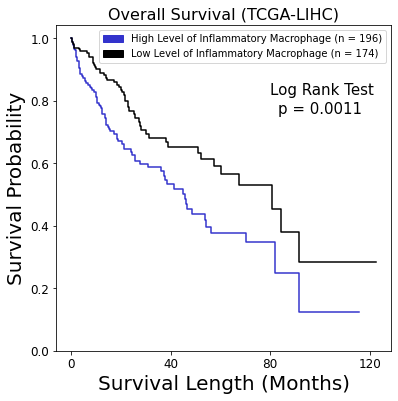

In [70]:
plt.figure(figsize=(6,6))
t,s = kmf(E_high, S_high)
plt.step(t,s,c='#3333cc')
t,s = kmf(E_low, S_low)
plt.step(t,s,c='k')
plt.xticks(np.arange(0,121,40),fontsize=12)
plt.yticks(np.arange(0,1.1,0.2),fontsize=12)
plt.xlabel('Survival Length (Months)', fontsize=20)
plt.ylabel('Survival Probability',fontsize=20)
high_patch = mpatches.Patch(color='#3333cc',label='High Level of Inflammatory Macrophage (n = %s)'%len(E_high))
low_patch = mpatches.Patch(color='k',label='Low Level of Inflammatory Macrophage (n = %s)'%len(E_low))
plt.text(80,0.82, 'Log Rank Test',fontsize=15)
plt.text(83,0.76, 'p = %s'%p,fontsize=15)
plt.legend(handles=[high_patch,low_patch],fontsize=10)
plt.title('Overall Survival (TCGA-LIHC)',fontsize=16)
plt.savefig('TCGA-LIHC.%s.OS.pdf'%selected_cell,format='pdf')

In [71]:
estimation = estimation.sort_values(selected_cell,ascending=False)
x = []
y = []
for key,value in enumerate(estimation[selected_cell]):
    x.append(key)
    y.append(value)

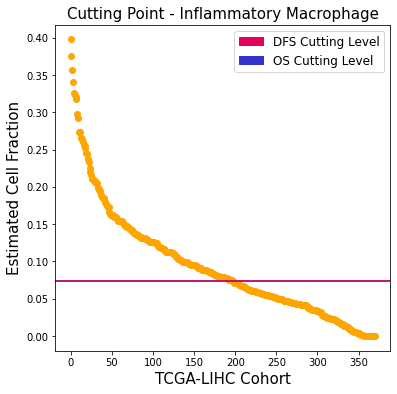

In [73]:
plt.figure(figsize=(6,6))
plt.scatter(x,y,color='orange')
plt.axhline(y=os_cut_level, xmin=0, xmax=100,color='#3333cc')
plt.axhline(y=dfs_cut_level, xmin=0, xmax=100,color='#e6005c')
plt.ylabel('Estimated Cell Fraction',fontsize=15)
plt.xlabel('TCGA-LIHC Cohort',fontsize=15)
plt.title('Cutting Point - Inflammatory Macrophage',fontsize=15)
dfs_patch = mpatches.Patch(color='#e6005c',label='DFS Cutting Level')
os_patch = mpatches.Patch(color='#3333cc',label='OS Cutting Level')
plt.legend(handles=[dfs_patch,os_patch],fontsize=12)
#plt.yscale("log")
plt.savefig('Cutting_Point.%s'%selected_cell,format='pdf')